In [2]:
import rtde_control
import rtde_receive
import pyrealsense2 as rs
import numpy as np
import sys
sys.path.append("../")

from SurfaceContact.move import move_default_pose
from SurfaceContact.control import SurfaceContactControl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# from recording_upload_server import CaptureServer

rtde_c = rtde_control.RTDEControlInterface("192.168.1.13")
rtde_r = rtde_receive.RTDEReceiveInterface("192.168.1.13")



In [6]:
pipeline = rs.pipeline()
pipeline.start()


In [7]:
move_default_pose(rtde_c)

In [8]:
from matplotlib import pyplot as plt

In [9]:

body_color_rgb = (227,124,100)
body_hsv_rad = (5,50,100)
sc = SurfaceContactControl(pipeline,rtde_c,rtde_r,body_color_rgb,body_hsv_rad)

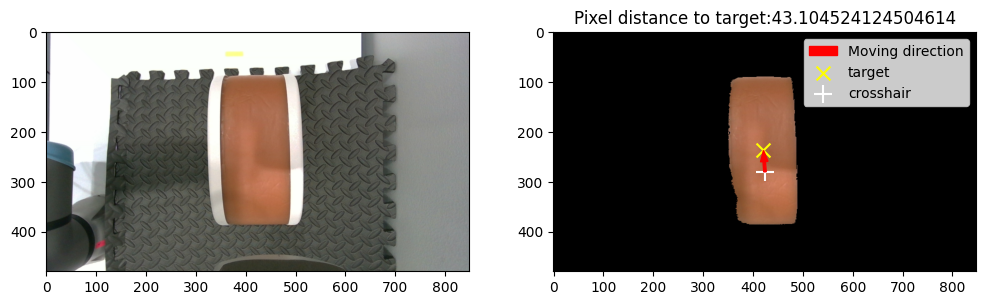

In [17]:
sc.fetchCameraStreamData()
fig = plt.figure(dpi=100,figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sc.showScene([ax1,ax2])


In [14]:
sc.mainloop()

[0.12905616329528558,
 -0.3997643987908087,
 0.560198690422045,
 -2.221300485277714,
 2.2212442140193405,
 0.00032102161852187483]

In [18]:
pipeline.stop()